# Predicting Covid-19 Cases, fatalities for India 

In [1]:
# Import useful libraries and functions
import pandas as pd
import numpy as np
# Converting Dates into usable form like ordinal.
from datetime import datetime as dt
# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# For Regression, Pre-processing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read entire world statistics data into a data frame
df = pd.read_csv('data.csv')
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [3]:
# Convert all dates into ordinal format
dates = df['Date']
i = 0
for a in dates:
    dates[i] = dt.strptime(a, '%Y-%m-%d').date()
    dates[i] = dates[i].toordinal()
    i = i+1

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
# Assign the date values in ordinal format to the dataFrame
df['Date'] = dates
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,737446,Afghanistan,0,0,0
1,737446,Albania,0,0,0
2,737446,Algeria,0,0,0
3,737446,Andorra,0,0,0
4,737446,Angola,0,0,0


# Entire World

## Add all data for India into a dataframe

In [5]:
world_data = df.groupby(['Date'],as_index=False).sum()
world_data.head()

,Date,Confirmed,Recovered,Deaths
0,737446,555,28,17
1,737447,654,30,18
2,737448,941,36,26
3,737449,1434,39,42
4,737450,2118,52,56


## Plot the cases data

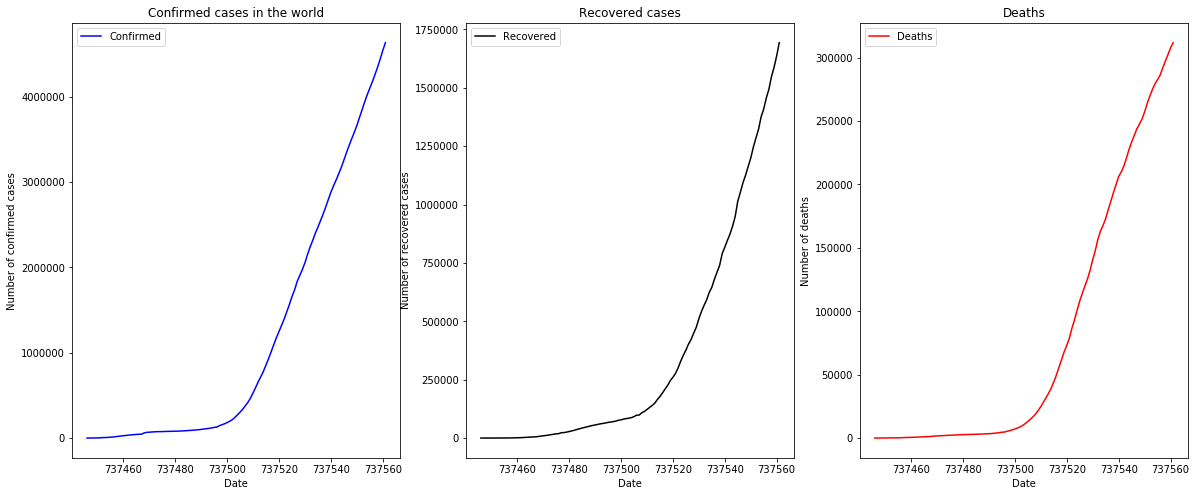

In [6]:
# Create a figure of size(20,8)
fig = plt.figure(figsize=(20,8))

# Add axes at corresponding positions in the figure
ax1 = fig.add_subplot(1,3,1)
ax1.plot(world_data['Date'].values,world_data['Confirmed'].values,color='b')
ax1.set_title('Confirmed cases in the world')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of confirmed cases')
ax1.legend(['Confirmed'])

ax2 = fig.add_subplot(1,3,2)
ax2.plot(world_data['Date'].values,world_data['Recovered'].values,color='k')
ax2.set_title('Recovered cases')
ax2.set_xlabel('Date')
ax2.set_ylabel('Number of recovered cases')
ax2.legend(['Recovered'])

ax3 = fig.add_subplot(1,3,3)
ax3.plot(world_data['Date'].values,world_data['Deaths'].values,color='r')
ax3.set_title('Deaths')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of deaths')
ax3.legend(['Deaths'])

### All the three quantities seem to be increasing exponentially. To fit the curves we will use polynomial Regression

# 1. Confirmed cases prediction

In [7]:
# Copy the Date and Confirmed Values of India into another dataframe
conf_data = world_data[['Date','Confirmed']]
x_conf = conf_data['Date'].values
y_conf = conf_data['Confirmed'].values

In [8]:
# Normalise the predictor variables using StandardScaler from sklearn.preprocessing
scale = StandardScaler()
x_norm = scale.fit_transform(x_conf.reshape(-1,1))

In [9]:
# Split the data into training and testing samples
x_train1,x_test1,y_train1,y_test1 = train_test_split(x_norm.reshape(-1,1),y_conf,test_size=0.2)

Text(0, 0.5, 'R^2 value')

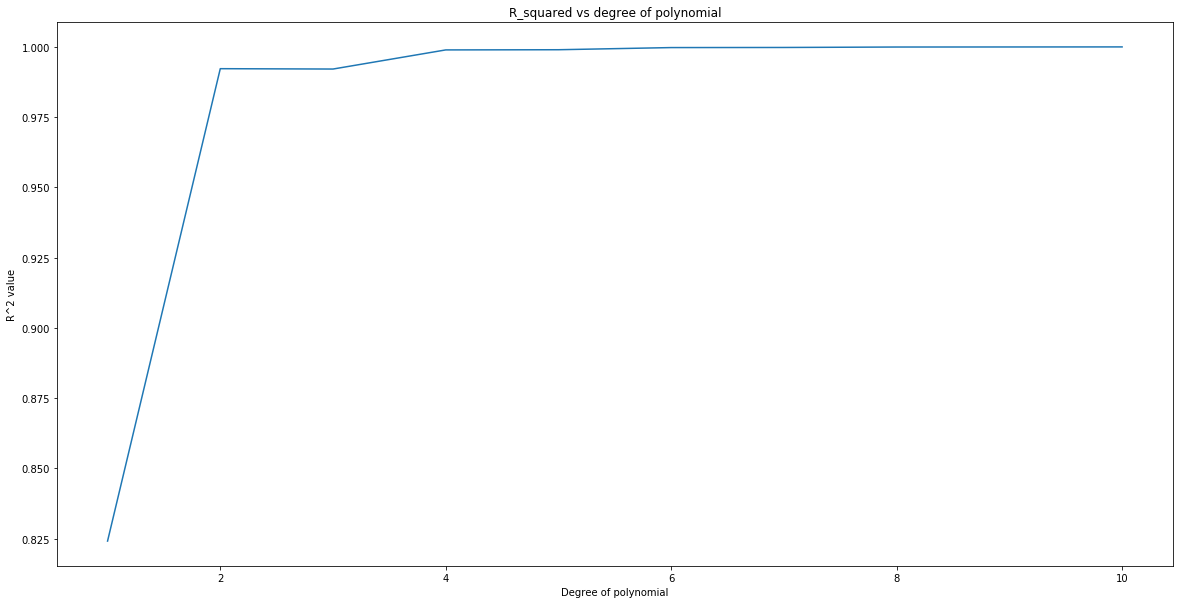

In [10]:
# Try and check the accuracy of various order polynomials to fit the data
max_degree = 10
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train11 = p.fit_transform(x_train1)
    x_test11 = p.fit_transform(x_test1)
    l = LinearRegression()
    l.fit(x_train11,y_train1.reshape(-1,1))
    y_pred1 = l.predict(x_test11)
    r_squared.append(r2_score(y_test1,y_pred1))
    i=i+1

    
# Plot the values of r^2 score for each degree
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,max_degree+1,1),r_squared)
plt.title("R_squared vs degree of polynomial")
plt.xlabel('Degree of polynomial')
plt.ylabel('R^2 value')

### To prevent underfitting and overfitting, the point where the graph starts to flatten is to be considered, i.e 3 degree polynomial is the best fit.

In [11]:
# Create a Linear Regression object
world_conf_model = LinearRegression()

# Get Polynomial Features
p = PolynomialFeatures(degree = 6,include_bias=False)
x_input = p.fit_transform(x_norm)

# Fit the model
world_conf_model.fit(x_input,y_conf)

# Check the accuracy of the model
world_conf_model.score(x_input,y_conf)

0.9996397880050507

### Interpolation

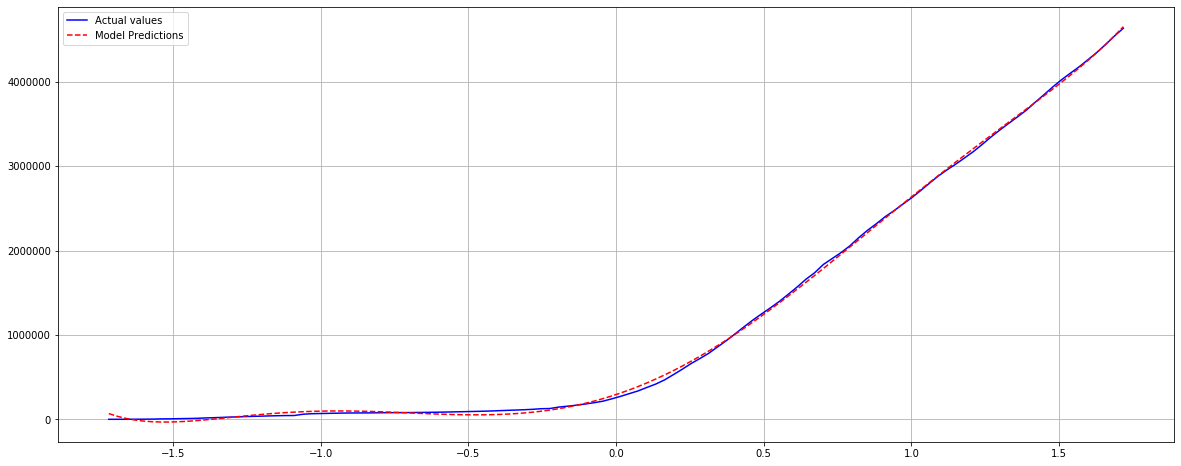

In [12]:
# Get predictions from the model
y_pred = world_conf_model.predict(x_input)

# Convert ordinal format to ordinary dates 
q = []
for a in x_conf:
    q.append(dt.fromordinal(a))
    
# Plot the model predictions vs Actual values
plt.figure(figsize=(20,8))
plt.plot(x_norm,y_conf,color='b')
plt.plot(x_norm,y_pred,'--',color='r')
plt.legend(['Actual values','Model Predictions'])
plt.grid(True)

### Extrapolation

In [13]:
# Find the difference between consecutive elements of the normalized input.
diff = float(x_norm[-2]-x_norm[-3])

In [14]:
start = float(x_norm[-1])

In [15]:
extra_dates = []
dates_norm = []
i = 0
while i<=15:
    extra_dates.append(x_conf[-1]+i)
    dates_norm.append(start+i*diff)
    i =i+1

In [16]:
dates_norm = np.array(dates_norm).reshape(-1,1)
dates_norm1 = p.fit_transform(dates_norm)
y_pred2 = world_conf_model.predict(dates_norm1)

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


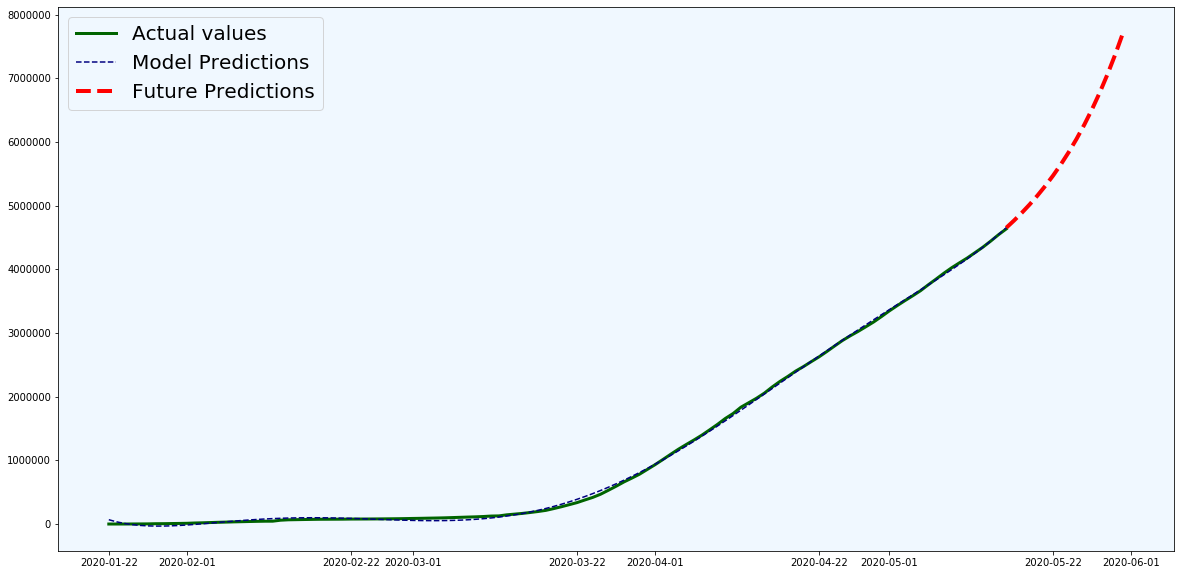

In [17]:
w = []
for a in extra_dates:
    w.append(dt.fromordinal(a))
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.plot(q,y_conf,color='darkgreen',linewidth=3.0)
plt.plot(q,y_pred,'--',color='navy')
plt.plot(extra_dates,y_pred2,'--',color='r',linewidth=4.0)
plt.legend(['Actual values','Model Predictions','Future Predictions'],prop={'size': 20})

In [18]:
conf_pred = pd.DataFrame(columns = ['Future Dates','Predictions'])
conf_pred['Future Dates'] = w
conf_pred['Predictions'] = y_pred2.astype('int')
conf_pred

,Future Dates,Predictions
0,2020-05-16,4652099
1,2020-05-17,4766284
2,2020-05-18,4888022
3,2020-05-19,5018315
4,2020-05-20,5158240
5,2020-05-21,5308953
6,2020-05-22,5471692
7,2020-05-23,5647781
8,2020-05-24,5838632
9,2020-05-25,6045750


# 2. Recovered cases prediction

In [19]:
# Add confirmed data from ind_data into a New DataFrame
rec_data = world_data[['Date','Recovered']]
x_rec = rec_data['Date'].values
y_rec = rec_data['Recovered'].values

In [20]:
# Normalise the predictor data using StandardScaler.
scale = StandardScaler()
x_norm = scale.fit_transform(x_rec.reshape(-1,1))

In [21]:
# Split data into training and testing sets.
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_norm.reshape(-1,1),y_rec,test_size=0.2)

Text(0, 0.5, 'R^2 value')

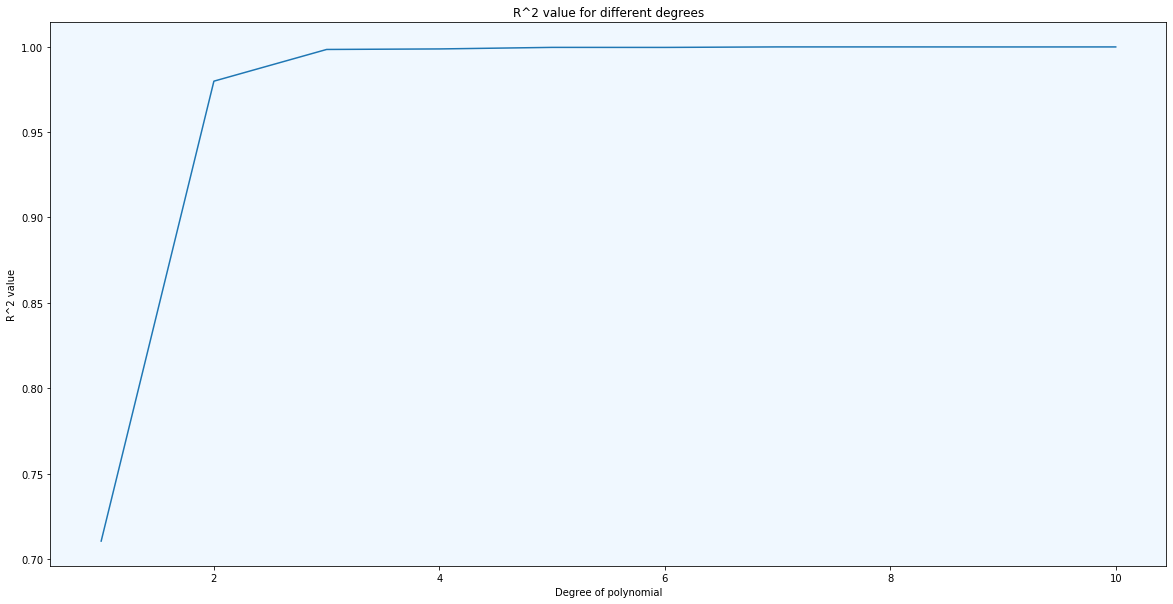

In [22]:
# Find the values of r^2 for different degrees
max_degree = 10
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train22 = p.fit_transform(x_train2)
    x_test22 = p.fit_transform(x_test2)
    l = LinearRegression()
    l.fit(x_train22,y_train2.reshape(-1,1))
    y_pred1 = l.predict(x_test22)
    r_squared.append(r2_score(y_test2,y_pred1))
    i=i+1
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,max_degree+1,1),r_squared)
plt.title('R^2 value for different degrees')
plt.xlabel('Degree of polynomial')
plt.ylabel('R^2 value')

### It is observed that after degree 4 the curve flattens. Hence, degree chosen = 4

In [23]:
# Create a Linear Regression object
world_rec_model = LinearRegression()

# Get Polynomial Features
p = PolynomialFeatures(degree = 3,include_bias=False)
x_input = p.fit_transform(x_norm)

# Fit the model
world_rec_model.fit(x_input,y_rec)

# Check the accuracy of the model
world_rec_model.score(x_input,y_rec)

0.9981376584935041

## Interpolation

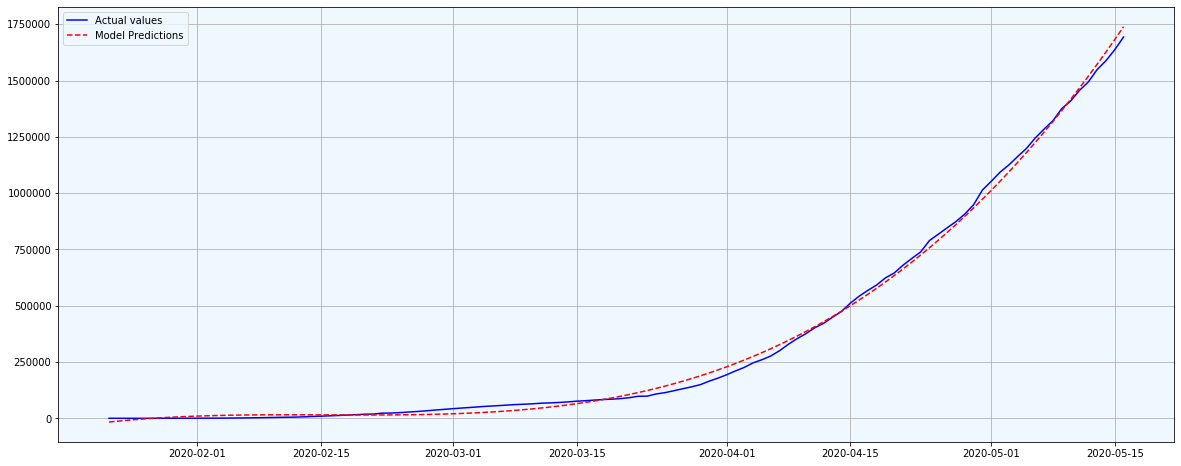

In [24]:
y_pred = world_rec_model.predict(x_input)
q = []
for a in x_rec:
    q.append(dt.fromordinal(a))
plt.figure(figsize=(20,8))
plt.plot(q,y_rec,color='b')
plt.plot(q,y_pred,'--',color='r')
plt.legend(['Actual values','Model Predictions'])
plt.grid(True)

## Extrapolation

In [25]:
diff = float(x_norm[-2]-x_norm[-3])

In [26]:
start = float(x_norm[-1])

In [27]:
extra_dates = []
dates_norm = []
i = 0
while i<=15:
    extra_dates.append(x_rec[-1]+i)
    dates_norm.append(start+i*diff)
    i =i+1

In [28]:
dates_norm = np.array(dates_norm).reshape(-1,1)
dates_norm1 = p.fit_transform(dates_norm)
y_pred2 = world_rec_model.predict(dates_norm1)
y_pred2

array([1738983.3676583 , 1797122.25281328, 1856550.71157096,
       1917282.85641774, 1979332.79983999, 2042714.6543241 ,
       2107442.53235645, 2173530.54642341, 2240992.80901138,
       2309843.43260674, 2380096.52969586, 2451766.21276513,
       2524866.59430093, 2599411.78678964, 2675415.90271765,
       2752893.05457134])

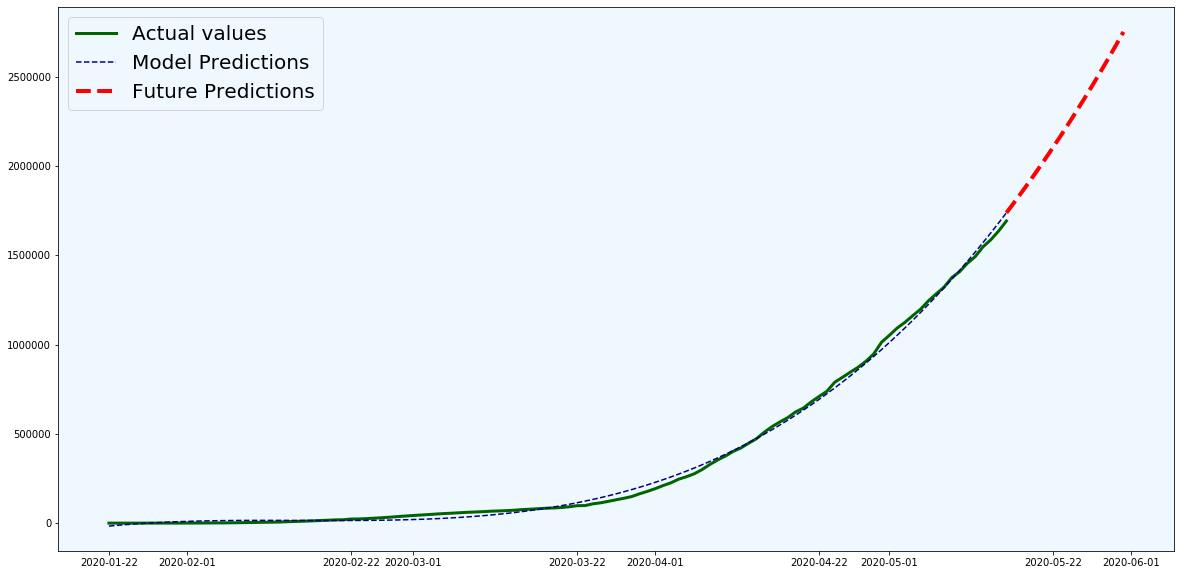

In [29]:
w = []
for a in extra_dates:
    w.append(dt.fromordinal(a))
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.plot(q,y_rec,color='darkgreen',linewidth=3.0)
plt.plot(q,y_pred,'--',color='navy')
plt.plot(extra_dates,y_pred2,'--',color='r',linewidth=4.0)
plt.legend(['Actual values','Model Predictions','Future Predictions'],prop={'size': 20})

In [30]:
rec_pred = pd.DataFrame(columns = ['Future Dates','Predictions'])
rec_pred['Future Dates'] = w
rec_pred['Predictions'] = y_pred2.astype('int')

In [31]:
rec_pred

,Future Dates,Predictions
0,2020-05-16,1738983
1,2020-05-17,1797122
2,2020-05-18,1856550
3,2020-05-19,1917282
4,2020-05-20,1979332
5,2020-05-21,2042714
6,2020-05-22,2107442
7,2020-05-23,2173530
8,2020-05-24,2240992
9,2020-05-25,2309843


# 3. Number of Deaths prediction

In [32]:
# Add death data from ind_data into a New DataFrame
death_data = world_data[['Date','Deaths']]
x_death = death_data['Date'].values
y_death = death_data['Deaths'].values

In [33]:
# Normalise the predictor data using StandardScaler.
scale = StandardScaler()
x_norm = scale.fit_transform(x_death.reshape(-1,1))

In [34]:
# Split data into training and testing sets.
x_train3,x_test3,y_train3,y_test3 = train_test_split(x_norm.reshape(-1,1),y_death,test_size=0.2)

Text(0, 0.5, 'R^2 value')

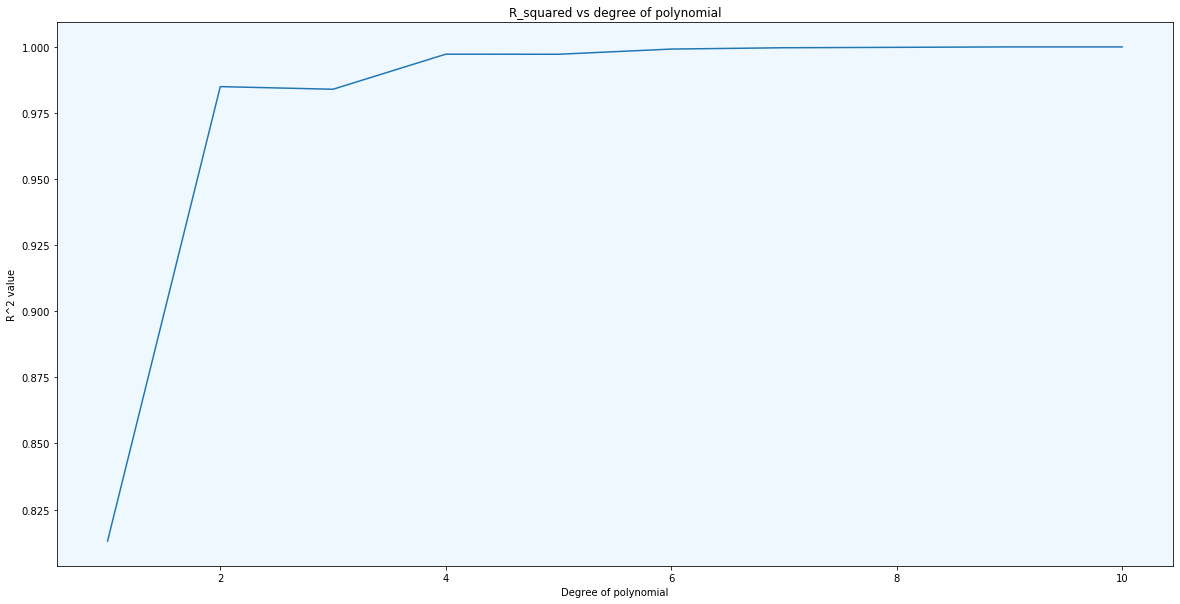

In [35]:
# Find the values of r^2 for different degrees
max_degree = 10
i=1
r_squared = []
while i<=max_degree:
    p = PolynomialFeatures(degree = i,include_bias=False)
    x_train33 = p.fit_transform(x_train3)
    x_test33 = p.fit_transform(x_test3)
    l = LinearRegression()
    l.fit(x_train33,y_train3.reshape(-1,1))
    y_pred1 = l.predict(x_test33)
    r_squared.append(r2_score(y_test3,y_pred1))
    i=i+1
plt.figure(figsize=(20,10))
plt.plot(np.arange(1,max_degree+1,1),r_squared)
plt.title("R_squared vs degree of polynomial")
plt.xlabel('Degree of polynomial')
plt.ylabel('R^2 value')

In [36]:
# Create a Linear Regression object
world_death_model = LinearRegression()

# Get Polynomial Features
p = PolynomialFeatures(degree = 6,include_bias=False)
x_input = p.fit_transform(x_norm.reshape(-1,1))

# Fit the model
world_death_model.fit(x_input,y_death)

# Check the accuracy of the model
world_death_model.score(x_input,y_death)

0.9991234017878254

### Interplation

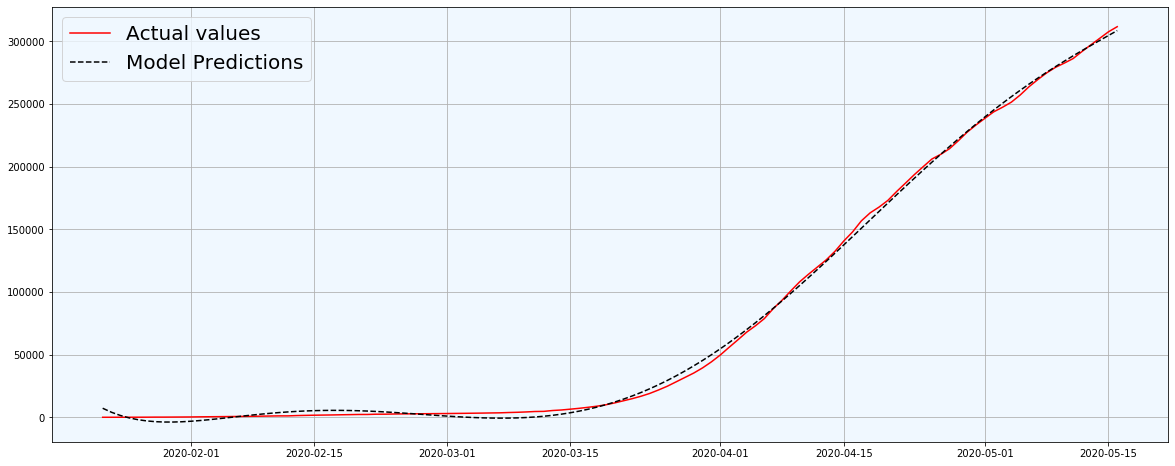

In [37]:
# Get predictions from the model
y_pred = world_death_model.predict(x_input)

# Convert ordinal format to ordinary dates 
q = []
for a in x_death:
    q.append(dt.fromordinal(a))
    
# Plot the model predictions vs Actual values
plt.figure(figsize=(20,8))
plt.plot(q,y_death,color='r')
plt.plot(q,y_pred,'--',color='k')
plt.legend(['Actual values','Model Predictions'],prop={'size': 20})
plt.grid(True)

### Extrapolation

In [38]:
# Find the difference between consecutive elements of the normalized input.
diff = float(x_norm[-2]-x_norm[-3])

In [39]:
start = float(x_norm[-1])

In [40]:
extra_dates = []
dates_norm = []
i = 0
while i<=15:
    extra_dates.append(x_death[-1]+i)
    dates_norm.append(start+i*diff)
    i =i+1

In [41]:
len(extra_dates)

16

In [42]:
dates_norm = np.array(dates_norm).reshape(-1,1)
dates_norm1 = p.fit_transform(dates_norm)
y_pred2 = world_death_model.predict(dates_norm1)
y_pred2

array([308675.33085274, 312648.12716497, 316672.40706156, 320786.22850059,
       325031.69064911, 329455.11826932, 334107.24949314, 339043.42698486,
       344323.79249209, 350013.48478484, 356182.84098285, 362907.60127115,
       370269.11700381, 378354.56219585, 387257.14840347, 397076.34299239])

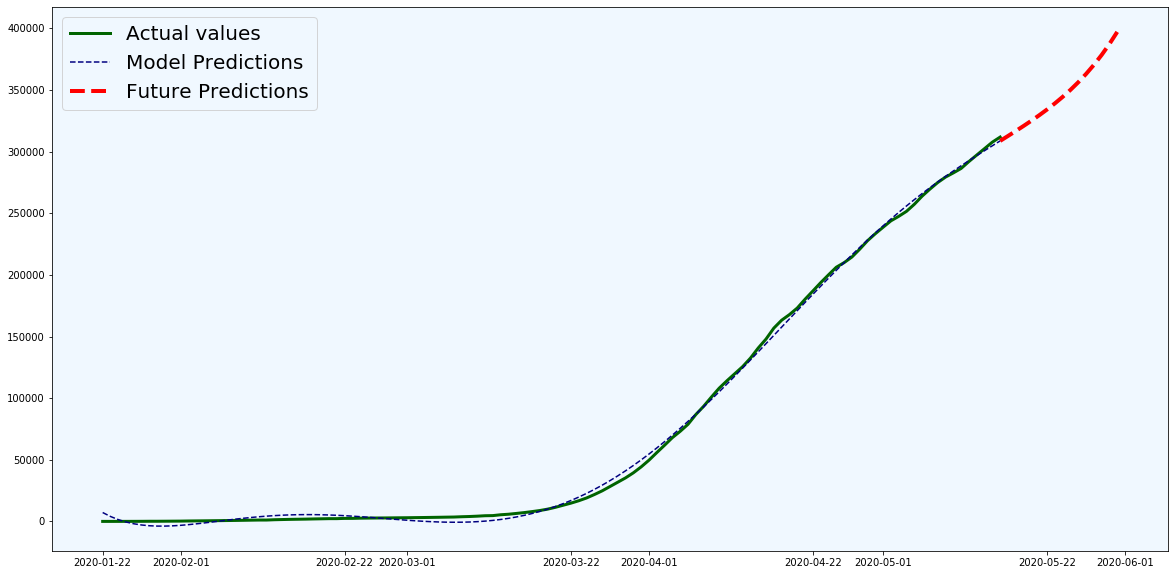

In [43]:
w = []
for a in extra_dates:
    w.append(dt.fromordinal(a))
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = 'aliceblue'
plt.plot(q,y_death,color='darkgreen',linewidth=3.0)
plt.plot(q,y_pred,'--',color='navy')
plt.plot(extra_dates,y_pred2,'--',color='r',linewidth=4.0)
plt.legend(['Actual values','Model Predictions','Future Predictions'],prop={'size': 20})

In [44]:
death_pred = pd.DataFrame(columns = ['Future Dates','Predictions'])
death_pred['Future Dates'] = w
death_pred['Predictions'] = y_pred2.astype('int')
death_pred

,Future Dates,Predictions
0,2020-05-16,308675
1,2020-05-17,312648
2,2020-05-18,316672
3,2020-05-19,320786
4,2020-05-20,325031
5,2020-05-21,329455
6,2020-05-22,334107
7,2020-05-23,339043
8,2020-05-24,344323
9,2020-05-25,350013
